In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


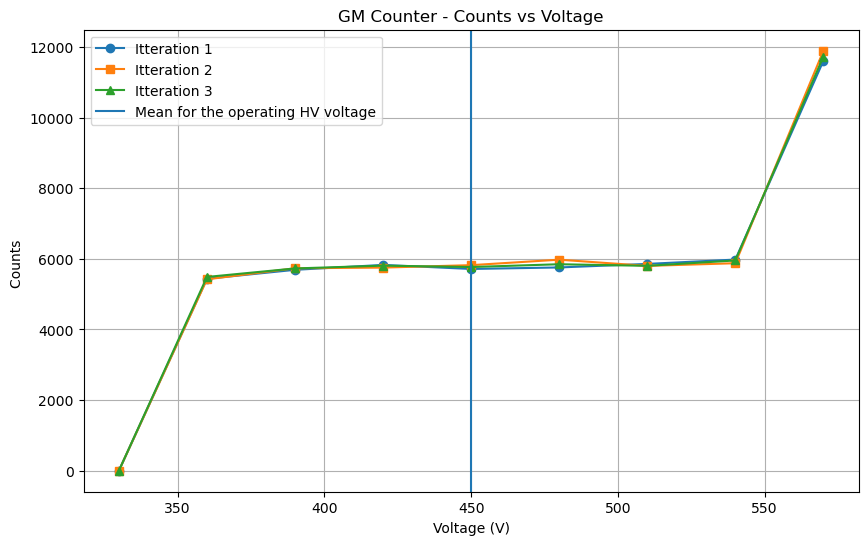

In [2]:
# import a text file and convert it to a numpy array

# Define the file pathm
file_path = 'GM Counter Table 1.xlsx'  # Replace with actual file path

data = pd.read_excel(file_path)

# Sort data by the 'V' (voltage) column (or another common name column if applicable)
data = data.sort_values(by="V")

# Plotting Counts against Voltage (V)
plt.figure(figsize=(10, 6))

# Plot each count column against Voltage
plt.plot(data["V"], data["Counts 1"], label="Itteration 1", marker='o')
plt.plot(data["V"], data["Counts 2"], label="Itteration 2", marker='s')
plt.plot(data["V"], data["Counts 3"], label="Itteration 3", marker='^')

# Adding labels and title
plt.xlabel("Voltage (V)")
plt.ylabel("Counts ")
plt.title("GM Counter - Counts vs Voltage")
plt.axvline(np.mean(data["V"][1:-1]) , label = "Mean for the operating HV voltage" )
plt.legend()
plt.grid()

# Show plot
plt.show()

In [3]:

def plot3_errr(x,y1,y2,y3):
    # Stack the y data to compute mean and std deviation
    y_data = np.vstack([y1, y2, y3])
    
    # Calculate the mean and standard deviation
    y_mean = np.mean(y_data, axis=0)
    y_std = np.std(y_data, axis=0)
    
    # Plot the average with error bars (standard deviation)
    plt.plot(x, y_mean,"y-",alpha=1,label='Mean')
    plt.errorbar(x, y_mean, yerr=y_std, fmt=' ',c="k", capsize=5, label='Mean with Std Dev',alpha=1)

   

    # Show the plot


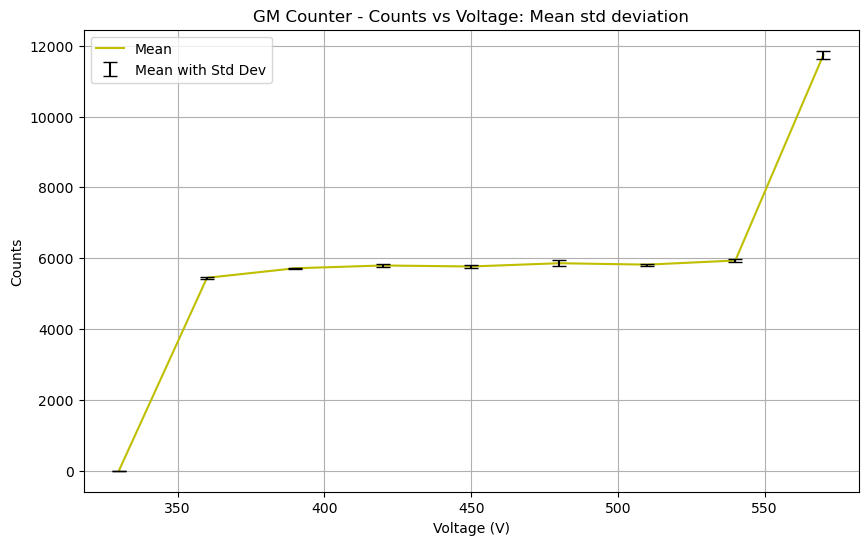

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [4]:
plt.figure(figsize=(10, 6))

plot3_errr(data["V"], data["Counts 1"].values, data["Counts 2"].values, data["Counts 3"].values)
plt.title(f'GM Counter - Counts vs Voltage: Mean std deviation')
plt.xlabel('Voltage (V)')
plt.ylabel('Counts')
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))


In [5]:


# Calculate mean and standard deviation for Counts 1, Counts 2, and Counts 3
data["Mean Counts"] = data[["Counts 1", "Counts 2", "Counts 3"]].mean(axis=1).round() 
data["Std Dev Counts"] = data[["Counts 1", "Counts 2", "Counts 3"]].std(axis=1).round()

# Prepare data for saving to a new Excel sheet
output_data = data[["V", "Counts 1", "Counts 2", "Counts 3", "Mean Counts", "Std Dev Counts"]]

# Save the results to a new Excel file
output_file_path = "processed_gm_counter_data.xlsx"  # Replace with your output file path
output_data.to_excel(output_file_path, index=False)

print("Error calculations and data saved to Excel successfully.")


Error calculations and data saved to Excel successfully.


In [6]:
# Calculate mean and standard deviation for Counts 1, Counts 2, and Counts 3
print(round(data["Counts 2"][1:-1].mean(axis=0)))
print((data["Counts 2"][1:-1].std(axis=0) ))



5767
173.85119526548587


In [7]:
data["V"][1:-1].values.std()

60.0

In [8]:
m12,m1,	m2,	mb = 208.112,	186.354,	23.422,	0.134

X = m1*m2 - m12*mb
Y = m1*m2*(m12+mb)-mb*m12*(m1+m2)
Z = Y*(m1+m2-m12-mb)/pow(X,2)

tau = X/Y * (1-pow(1-Z,0.5) )
print(pow(10,6)*tau)

taus = [315.1, 179.7,1040.3]
print(np.mean(taus),np.std(taus))


179.75777631763364
511.7 377.84190697521444


In [31]:
#60 sec
noabs = 5640
copper_count = [5166,5199,5313,5011]
log_copper_count = [np.log(x) for x in copper_count]
thickness_copper = [0.07,0.14,0.21,1.28]

PB_count = [5515,5119,4732,4679]
log_PB_count = [np.log(x) for x in PB_count]
thickness_pb = [0.3,0.6,0.9,1.2]



In [ ]:

#100 sec
noabs = 6850
copper_count = [6551,6530,6602,6284]
log_copper_count = [np.log(x) for x in copper_count]

PB_count = [6938, 6392,5840,5897]
log_PB_count = [np.log(x) for x in PB_count]

Slope = -0.0344 ± 0.0172


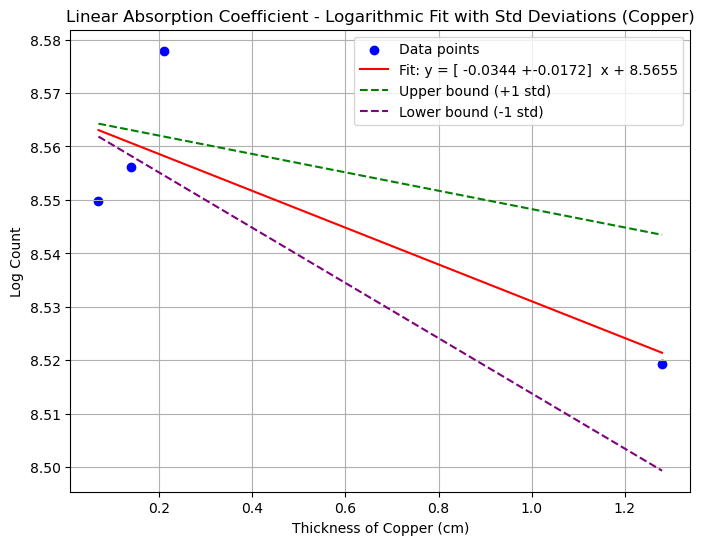

0.03442687870345468


In [32]:


# Perform linear regression on thickness vs. log copper count
slope, intercept, r_value, p_value, std_err = linregress(thickness_copper, log_copper_count)

# Print slope with standard deviation
print(f"Slope = {slope:.4f} ± {std_err:.4f}")

# Generate fitted line and the upper/lower bounds based on standard deviation
fit_line = [slope * x + intercept for x in thickness_copper]
upper_bound = [(slope + std_err) * x + intercept for x in thickness_copper]
lower_bound = [(slope - std_err) * x + intercept for x in thickness_copper]

# Plot the data points, fitted line, and the lines for ± standard deviation
plt.figure(figsize=(8, 6))
plt.scatter(thickness_copper, log_copper_count, color="blue", label="Data points")
plt.plot(thickness_copper, fit_line, color="red", label=f"Fit: y = [ {slope:.4f} +-{std_err:.4f}]  x + {intercept:.4f}")
plt.plot(thickness_copper, upper_bound, color="green", linestyle="--", label="Upper bound (+1 std)")
plt.plot(thickness_copper, lower_bound, color="purple", linestyle="--", label="Lower bound (-1 std)")

# Labeling the plot
plt.xlabel("Thickness of Copper (cm)")
plt.ylabel("Log Count")
plt.title("Linear Absorption Coefficient - Logarithmic Fit with Std Deviations (Copper)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

absoprtion = -1*slope
print(absoprtion)

Slope = -0.1906 ± 0.0373


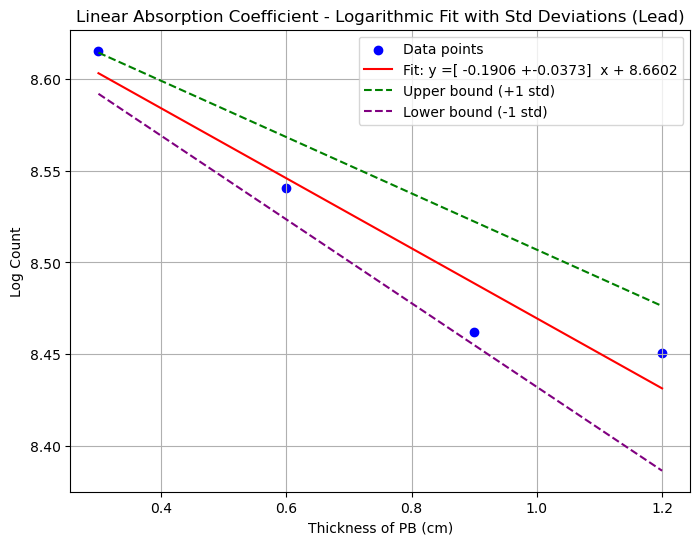

0.1905909612744896


In [33]:

# Perform linear regression on thickness vs. log PB count
slope, intercept, r_value, p_value, std_err = linregress(thickness_pb, log_PB_count)

# Print slope with standard deviation
print(f"Slope = {slope:.4f} ± {std_err:.4f}")

# Generate fitted line and the upper/lower bounds based on standard deviation
fit_line = [slope * x + intercept for x in thickness_pb]
upper_bound = [(slope + std_err) * x + intercept for x in thickness_pb]
lower_bound = [(slope - std_err) * x + intercept for x in thickness_pb]

# Plot the data points, fitted line, and the lines for ± standard deviation
plt.figure(figsize=(8, 6))
plt.scatter(thickness_pb, log_PB_count, color="blue", label="Data points")
plt.plot(thickness_pb, fit_line, color="red", label=f"Fit: y =[ {slope:.4f} +-{std_err:.4f}]  x + {intercept:.4f}")
plt.plot(thickness_pb, upper_bound, color="green", linestyle="--", label="Upper bound (+1 std)")
plt.plot(thickness_pb, lower_bound, color="purple", linestyle="--", label="Lower bound (-1 std)")

# Labeling the plot
plt.xlabel("Thickness of PB (cm)")
plt.ylabel("Log Count")
plt.title("Linear Absorption Coefficient - Logarithmic Fit with Std Deviations (Lead)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
absoprtion = -1*slope

print(absoprtion)

In [26]:

# Constants
NA = 6.022e23  # Avogadro's number in atoms/mol
barn_conversion = 1e-28  # 1 barn = 10^-28 m^2

# # Data for Aluminum
# rho_al = 2.7e3  # Density of Aluminum in kg/m^3
# Z_al = 13       # Atomic number of Aluminum
# A_al = 26.98    # Atomic mass of Aluminum in g/mol
# mu_al = float(input("Enter the linear attenuation coefficient (mu) for Aluminum (in m^-1): "))

# Data for Copper
rho_cu = 8.92e3  # Density of Copper in kg/m^3
Z_cu = 29        # Atomic number of Copper
A_cu = 63.55     # Atomic mass of Copper in g/mol
mu_cu = 0.0344/100   # Linear attenuation coefficient for Copper in cm^-1

# Function to calculate mass attenuation coefficient and sigma_C
def calculate_sigma(mu, rho, Z, A):
    # Convert atomic mass to kg/mol for consistency with density units
    A_kg = A / 1000
    # Calculate mass attenuation coefficient (mu/rho)
    mass_attenuation_coefficient = mu / rho
    # Calculate electron density (ne)
    ne = (Z * rho) / (A_kg * NA)
    # Calculate cross-section per electron (sigma_C) in m^2, then convert to barns
    sigma_C = (mass_attenuation_coefficient / ne) / barn_conversion
    return mass_attenuation_coefficient, sigma_C

# Calculate for Aluminum
#mass_att_al, sigma_C_al = calculate_sigma(mu_al, rho_al, Z_al, A_al)

# Calculate for Copper
mass_att_cu, sigma_C_cu = calculate_sigma(mu_cu, rho_cu, Z_cu, A_cu)

# # Display the results
# print("\nResults:")
# print(f"Aluminum (Al):")
# print(f"Mass Attenuation Coefficient (mu/rho): {mass_att_al:.4e} m^2/kg")
# print(f"Cross-section per electron (sigma_C): {sigma_C_al:.4f} barns")

print(f"\nCopper (Cu):")
print(f"Mass Attenuation Coefficient (mu/rho): {mass_att_cu:.4e} m^2/kg")
print(f"Cross-section per electron (sigma_C): {sigma_C_cu:.4e} barns")



Copper (Cu):
Mass Attenuation Coefficient (mu/rho): 3.8565e-08 m^2/kg
Cross-section per electron (sigma_C): 5.7054e+37 barns


In [27]:
import numpy as np

# Constants
NA = 6.022e23  # Avogadro's number in atoms/mol
barn_conversion = 1e-28  # 1 barn = 10^-28 m^2

# Data for Copper
rho_cu = 8.92  # Density of Copper in g/cm^3 (converted from kg/m^3 to g/cm^3)
Z_cu = 29       # Atomic number of Copper
A_cu = 63.55    # Atomic mass of Copper in g/mol
mu_cu = 0.0344  # Linear attenuation coefficient for Copper in cm^-1

# Function to calculate mass attenuation coefficient and sigma_C
def calculate_sigma(mu, rho, Z, A):
    # Calculate mass attenuation coefficient (mu/rho in cm^2/g)
    mass_attenuation_coefficient = mu / rho
    # Calculate electron density (ne) in electrons/cm^3
    ne = (Z * rho) / (A * NA)
    # Calculate cross-section per electron (sigma_C) in barns
    sigma_C = (mass_attenuation_coefficient / ne) / barn_conversion
    return mass_attenuation_coefficient, sigma_C

# Calculate for Copper
mass_att_cu, sigma_C_cu = calculate_sigma(mu_cu, rho_cu, Z_cu, A_cu)

# Display the results
print(f"\nCopper (Cu):")
print(f"Mass Attenuation Coefficient (mu/rho): {mass_att_cu:.4e} cm^2/g")
print(f"Cross-section per electron (sigma_C): {sigma_C_cu:.4e} barns")



Copper (Cu):
Mass Attenuation Coefficient (mu/rho): 3.8565e-03 cm^2/g
Cross-section per electron (sigma_C): 5.7054e+48 barns
